# Preface

In this notebook, I write the business code logic that enables me to plot the figures, except done for the median downsampled set of sequences.

This means that code that I intend to copy and paste over will get stored in `figures.py`, and then called from both notebooks.

In [89]:
import networkx as nx
import figures as fg
import custom_funcs as cf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

from collections import defaultdict

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
seaborn.set_context("paper")
seaborn.set_style('white')

In [91]:
# Load the graphs into memory.
Gs = []

for i in range(100):
    g = nx.read_gpickle('md_final_graphs/20150902_all_ird Final Graph {0}.pkl'.format(i))
    g = cf.impute_reassortant_status(g)
    g = cf.impute_weights(g)
    g = cf.remove_zero_weighted_edges(g)  
    Gs.append(g)

len(Gs)

100

In [92]:
# Compile the total counts of number of nodes in each graph.
# i.e. plot representation

h_subtype_data = defaultdict(list)
c_subtype_data = defaultdict(list)
s_subtype_data = defaultdict(list)
for G in Gs:
    # Human-human, chicken-chicken, and swine-swine
    hh_nodes = fg.same_host_descent(G, 'Human')
    cc_nodes = fg.same_host_descent(G, 'Chicken')
    ss_nodes = fg.same_host_descent(G, 'Swine')
    
    hh_subtypes = fg.subtype_counts(hh_nodes, G, log=True)
    ss_subtypes = fg.subtype_counts(ss_nodes, G, log=True)
    cc_subtypes = fg.subtype_counts(cc_nodes, G, log=True)
    
    def add_to_compiled(subtype_data, subtypes):
        for subtype, counts in subtypes.items():
            subtype_data[subtype].append(counts)
            
    add_to_compiled(h_subtype_data, hh_subtypes)
    add_to_compiled(s_subtype_data, ss_subtypes)
    add_to_compiled(c_subtype_data, cc_subtypes)

In [93]:
s_subtype_data

defaultdict(list,
            {'H1N1': [0.3010299956639812,
              0.3010299956639812,
              0.47712125471966244,
              0.47712125471966244,
              0.69897000433601886,
              0.47712125471966244,
              0.3010299956639812,
              0.3010299956639812,
              0.3010299956639812,
              0.47712125471966244,
              0.3010299956639812,
              0.47712125471966244,
              0.3010299956639812,
              0.3010299956639812,
              0.3010299956639812,
              0.47712125471966244,
              0.3010299956639812,
              0.3010299956639812,
              0.77815125038364363,
              0.3010299956639812,
              0.47712125471966244,
              0.3010299956639812,
              0.3010299956639812,
              0.47712125471966244,
              0.3010299956639812,
              0.3010299956639812,
              0.3010299956639812],
             'H1N2': [1.0,
              1.04

/home/ericmjl/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


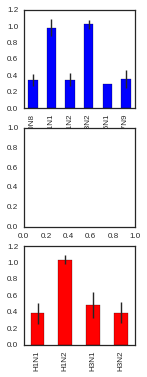

In [94]:
# Plot the data
def summarized_data(subtype_data):
    means = dict()
    stds = dict()
    for k, v in subtype_data.items():
        means[k] = np.mean(v)
        stds[k] = np.std(v)
    return means, stds

h_means, h_stds = summarized_data(h_subtype_data)
# c_means, c_stds = summarized_data(c_subtype_data)
s_means, s_stds = summarized_data(s_subtype_data)

fig = plt.figure(figsize=(2,6))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

def plot_subtype_counts(means, stds, ax, color='blue'):
    data = pd.DataFrame()
    data['means'] = pd.Series(means)
    data['stds'] = pd.Series(stds)

    data['means'].plot(kind='bar', ax=ax, yerr=data['stds'], color=color)

plot_subtype_counts(h_means, h_stds, ax1, color='blue')
# plot_subtype_counts(c_means, c_stds, ax2)
plot_subtype_counts(s_means, s_stds, ax3, color='red')

## Make Figures for Proportion Reassortant Same vs. Different Hosts

In [166]:
data_all_props = defaultdict(list)
null_all_props = defaultdict(list)


for G in Gs:
    G = cf.clean_host_species_names(G)
    data_props = cf.edge_proportion_reassortant(G, attr='host_species', exclusions=['Unknown'])
    null_props = fg.null_distribution_proportion_reassortant(G, equally=True)
    
    print(data_props, null_props)
    # Append the data to the compilation
    for k, v in data_props.items():
        data_all_props[k].append(v)
        
    for k, v in null_props.items():
        null_all_props[k].append(v)

{'diff_attr': 0.11912568306010929, 'same_attr': 0.0735930735930736} {'diff_attr': 0.11370882040382572, 'same_attr': 0.21739130434782608}
{'diff_attr': 0.12651821862348178, 'same_attr': 0.06210191082802548} {'diff_attr': 0.11642493139945119, 'same_attr': 0.09090909090909091}
{'diff_attr': 0.12899786780383796, 'same_attr': 0.0514018691588785} {'diff_attr': 0.10867865519937452, 'same_attr': 0.04}
{'diff_attr': 0.13807531380753138, 'same_attr': 0.042042042042042045} {'diff_attr': 0.10577705451586655, 'same_attr': 0.10526315789473684}
{'diff_attr': 0.13550232391848407, 'same_attr': 0.04659146640510054} {'diff_attr': 0.10843373493975904, 'same_attr': 0.07692307692307693}
{'diff_attr': 0.13674686407567346, 'same_attr': 0.04331087584215592} {'diff_attr': 0.10982075233526888, 'same_attr': 0.0857142857142857}
{'diff_attr': 0.1316916488222698, 'same_attr': 0.05745341614906832} {'diff_attr': 0.11203319502074689, 'same_attr': 0.13043478260869565}
{'diff_attr': 0.11497189575881452, 'same_attr': 0.05

In [167]:
def summarize_prop_reassortant(all_props):
    means = dict()
    stds = dict()
    
    for k, v in all_props.items():
        means[k] = np.mean(v)
        stds[k] = np.std(v)

    return means, stds

data_prop_mean, data_prop_std = summarize_prop_reassortant(data_all_props)
null_prop_mean, null_prop_std = summarize_prop_reassortant(null_all_props)

In [168]:
pd.Series(null_all_props)

diff_attr    [0.11370882040382572, 0.11642493139945119, 0.1...
same_attr    [0.21739130434782608, 0.09090909090909091, 0.0...
dtype: object

/home/ericmjl/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


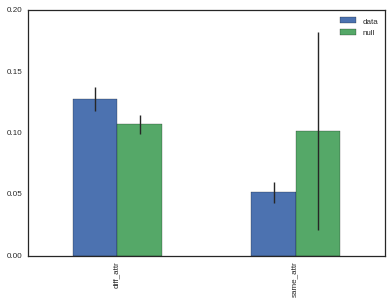

In [169]:
means = pd.DataFrame()
means['data'] = pd.Series(data_prop_mean)
means['null'] = pd.Series(null_prop_mean)

stds = pd.DataFrame()
stds['data'] = pd.Series(data_prop_std)
stds['null'] = pd.Series(null_prop_std)

means.plot(kind='bar', yerr=stds)